In [ ]:
!pip install --pre deepchem
!pip install rdkit-pypi
from rdkit import rdBase
from rdkit import RDConfig
!pip install --pre deepchem
!pip install rdkit-pypi
!pip install rdkit-pypi
!pip install mordred

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 693 kB 6.8 MB/s 
     |████████████████████████████████| 29.3 MB 1.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 29.3 MB 81.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 128 kB 8.4 MB/s 
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176721 sha256=66dc2a134e6f4460ad161383b306126e80ad9d70159acf4435ca45dc0bb29690
  Stored in directory:

In [ ]:
!pip install --pre deepchem
!pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import deepchem as dc
dc.__version__

'2.7.1'

In [ ]:
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
import pandas as pd
import numpy as np
from mordred import Calculator, descriptors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from keras.layers import Dense, Input, Activation
from keras.layers import BatchNormalization,Add
from keras.optimizers import Adam
from keras.models import Model, load_model
from keras import callbacks
from keras import backend as K
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action="ignore",category=DeprecationWarning)
warnings.filterwarnings(action="ignore",category=FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dataset = pd.read_csv('/content/drive/MyDrive/dataset_covid/file1.csv')

In [ ]:
def canonical_smiles(smiles):
    mols = [Chem.MolFromSmiles(smi) for smi in smiles] 
    smiles = [Chem.MolToSmiles(mol) for mol in mols]
    return smiles

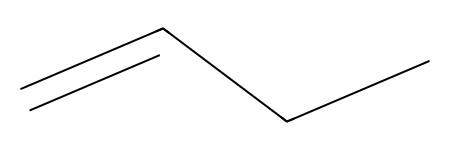

In [ ]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

Chem.MolFromSmiles('C=CCC')

In [ ]:
Canon_SMILES = canonical_smiles(dataset.SMILE)

In [ ]:
dataset['SMILE'] = Canon_SMILES
dataset

,SMILE,logP,qed,SAS,label
0,CCCS(=O)(=O)c1ccccc1C(=O)Nc1nnc(CC)s1,2.53650,0.871865,2.227853,1
1,CNC(=O)[C@H](C)CN(C)Cc1cc(=O)n2cccc(C)c2[nH+]1,0.23592,0.880917,4.069782,1
2,COCCNC(=O)/C(C#N)=C/c1cccc(O)c1,1.06178,0.468379,2.213129,1
3,CNC(=O)CN1c2ccccc2C(=O)N(C)[C@H]1c1ccccc1O,1.72900,0.908245,2.856964,1
4,CC(=O)N[C@H](C)C(=O)Nc1ccc(Sc2nncs2)c(Cl)c1,2.80580,0.854635,2.884518,1
...,...,...,...,...,...
2585,C[C@H]1CCC(=O)[C@H]([C@@H]2CCC[NH2+]2)C1,0.71750,0.647642,4.986801,0
2586,COc1cccc(Cn2nc3c(N4CCOCC4)nccn3c2=O)c1,0.78450,0.709817,2.366587,0
2587,COc1ccc2c(CN(C)[C@@H](C)Cc3ccccc3OC)cc(=O)oc2c1,3.87320,0.574334,2.660191,0
2588,N#Cc1ccc(Cl)cc1NC(=O)CN1C(=O)NC(c2ccccc2)(c2cc...,3.64578,0.570734,2.364954,0


In [ ]:
duplicates_smiles = dataset[dataset['SMILE'].duplicated()]['SMILE'].values
len(duplicates_smiles)
# Create a list for duplicate smiles
dataset[dataset['SMILE'].isin(duplicates_smiles)].sort_values(by=['SMILE'])

,SMILE,logP,qed,SAS,label


In [ ]:
dataset_new = dataset.drop_duplicates(subset=['SMILE'])

def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles] 
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()
    
    Mol_descriptors =[]
    for mol in mols:
        # add hydrogens to molecules
        mol=Chem.AddHs(mol)
        # Calculate all 200 descriptors for each molecule
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names 

# Function call
Mol_descriptors,desc_names = RDkit_descriptors(dataset_new['SMILE'])

In [ ]:
df_with_200_descriptors = pd.DataFrame(Mol_descriptors,columns=desc_names)
df_with_200_descriptors

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,13.331848,-6.110897,13.331848,0.052180,0.873366,339.442,322.306,339.071133,118,0,...,0,0,1,0,0,0,0,0,0,0
1,13.233421,-4.751706,13.233421,0.055204,0.859953,303.386,280.202,303.181552,118,0,...,0,0,0,0,0,0,0,0,0,0
2,12.537473,-3.809998,12.537473,0.776355,0.462133,246.266,232.154,246.100442,94,0,...,0,0,0,0,0,0,0,0,0,0
3,13.818979,-4.217433,13.818979,0.407775,0.901310,325.368,306.216,325.142641,124,0,...,0,0,0,0,0,0,0,0,0,0
4,12.970445,-3.973922,12.970445,0.121629,0.860138,356.860,343.756,356.016845,116,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2585,13.186895,-4.698958,13.186895,2.674537,0.636654,182.287,162.127,182.153941,74,0,...,0,0,0,0,0,0,0,0,0,0
2586,13.507964,-3.667948,13.507964,0.113899,0.698327,341.371,322.219,341.148789,130,0,...,0,0,0,0,0,0,0,0,0,0
2587,12.902296,-4.727469,12.902296,1.021646,0.593457,367.445,342.245,367.178358,142,0,...,0,0,0,0,0,0,0,0,0,0
2588,14.560487,-4.161604,14.560487,0.519680,0.586170,444.878,427.742,444.098918,158,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
def morgan_fpts(data):
    Morgan_fpts = []
    for i in data:
        mol = Chem.MolFromSmiles(i) 
        fpts =  AllChem.GetMorganFingerprintAsBitVect(mol,2,2048)
        mfpts = np.array(fpts)
        Morgan_fpts.append(mfpts)  
    return np.array(Morgan_fpts)
   

In [ ]:
Morgan_fpts = morgan_fpts(dataset_new['SMILE'])

In [ ]:
Morgan_fingerprints = pd.DataFrame(Morgan_fpts,columns=['Col_{}'.format(i) for i in range(Morgan_fpts.shape[1])])
Morgan_fingerprints

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_2038,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2585,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2587,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def All_Mordred_descriptors(data):
    calc = Calculator(descriptors, ignore_3D=False)
    mols = [Chem.MolFromSmiles(smi) for smi in data]
    
    # pandas df
    df = calc.pandas(mols)
    return df

In [ ]:
mordred_descriptors = All_Mordred_descriptors(dataset_new['SMILE'])

100%|██████████| 2590/2590 [23:27<00:00,  1.84it/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from keras.layers import Dense, Input, Activation
from keras.layers import BatchNormalization,Add
from keras.optimizers import Adam
from keras.models import Model, load_model
from keras import callbacks
from keras import backend as K
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action="ignore",category=DeprecationWarning)
warnings.filterwarnings(action="ignore",category=FutureWarning)


Using TensorFlow backend.


In [ ]:
df_struct=pd.read_csv('/content/drive/MyDrive/dataset_new/molecule/structures.csv')
df_train_sub_charge=pd.read_csv('/content/drive/MyDrive/dataset_new/molecule/mulliken_charges.csv')
df_train_sub_tensor=pd.read_csv('/content/drive/MyDrive/dataset_new/molecule/magnetic_shielding_tensors.csv')


## Feature Engineering


In [ ]:
def map_atom_info(df_1,df_2, atom_idx):
    df = pd.merge(df_1, df_2, how = 'left',
                  left_on  = ['molecule_name', f'atom_index_{atom_idx}'],
                  right_on = ['molecule_name',  'atom_index'])
    df = df.drop('atom_index', axis=1)

    return df

for atom_idx in [0,1]:
    df_train = map_atom_info(df_train,df_struct, atom_idx)
    df_train = map_atom_info(df_train,df_train_sub_charge, atom_idx)
    df_train = map_atom_info(df_train,df_train_sub_tensor, atom_idx)
    df_train = df_train.rename(columns={'atom': f'atom_{atom_idx}',
                                        'x': f'x_{atom_idx}',
                                        'y': f'y_{atom_idx}',
                                        'z': f'z_{atom_idx}',
                                        'mulliken_charge': f'charge_{atom_idx}',
                                        'XX': f'XX_{atom_idx}',
                                        'YX': f'YX_{atom_idx}',
                                        'ZX': f'ZX_{atom_idx}',
                                        'XY': f'XY_{atom_idx}',
                                        'YY': f'YY_{atom_idx}',
                                        'ZY': f'ZY_{atom_idx}',
                                        'XZ': f'XZ_{atom_idx}',
                                        'YZ': f'YZ_{atom_idx}',
                                        'ZZ': f'ZZ_{atom_idx}',})
    df_test = map_atom_info(df_test,df_struct, atom_idx)
    df_test = df_test.rename(columns={'atom': f'atom_{atom_idx}',
                                'x': f'x_{atom_idx}',
                                'y': f'y_{atom_idx}',
                                'z': f'z_{atom_idx}'})
    #add some features
    df_struct['c_x']=df_struct.groupby('molecule_name')['x'].transform('mean')
    df_struct['c_y']=df_struct.groupby('molecule_name')['y'].transform('mean')
    df_struct['c_z']=df_struct.groupby('molecule_name')['z'].transform('mean')
    df_struct['atom_n']=df_struct.groupby('molecule_name')['atom_index'].transform('max')



Distance feature. 

In [ ]:
def make_features(df):
    df['dx']=df['x_1']-df['x_0']
    df['dy']=df['y_1']-df['y_0']
    df['dz']=df['z_1']-df['z_0']
    df['distance']=(df['dx']**2+df['dy']**2+df['dz']**2)**(1/2)
    return df
df_train=make_features(df_train)
df_test=make_features(df_test) 

In [ ]:
def get_closest_farthest(df):
    df_temp=df.loc[:,["molecule_name","atom_index_0","atom_index_1","distance","x_0","y_0","z_0","x_1","y_1","z_1"]].copy()
    df_temp_=df_temp.copy()
    df_temp_= df_temp_.rename(columns={'atom_index_0': 'atom_index_1',
                                       'atom_index_1': 'atom_index_0',
                                       'x_0': 'x_1',
                                       'y_0': 'y_1',
                                       'z_0': 'z_1',
                                       'x_1': 'x_0',
                                       'y_1': 'y_0',
                                       'z_1': 'z_0'})
    df_temp_all=pd.concat((df_temp,df_temp_),axis=0)

    df_temp_all["min_distance"]=df_temp_all.groupby(['molecule_name', 'atom_index_0'])['distance'].transform('min')
    df_temp_all["max_distance"]=df_temp_all.groupby(['molecule_name', 'atom_index_0'])['distance'].transform('max')
    
    df_temp= df_temp_all[df_temp_all["min_distance"]==df_temp_all["distance"]].copy()
    df_temp=df_temp.drop(['x_0','y_0','z_0','min_distance'], axis=1)
    df_temp= df_temp.rename(columns={'atom_index_0': 'atom_index',
                                         'atom_index_1': 'atom_index_closest',
                                         'distance': 'distance_closest',
                                         'x_1': 'x_closest',
                                         'y_1': 'y_closest',
                                         'z_1': 'z_closest'})

    for atom_idx in [0,1]:
        df = map_atom_info(df,df_temp, atom_idx)
        df = df.rename(columns={'atom_index_closest': f'atom_index_closest_{atom_idx}',
                                        'distance_closest': f'distance_closest_{atom_idx}',
                                        'x_closest': f'x_closest_{atom_idx}',
                                        'y_closest': f'y_closest_{atom_idx}',
                                        'z_closest': f'z_closest_{atom_idx}'})

    df_temp= df_temp_all[df_temp_all["max_distance"]==df_temp_all["distance"]].copy()
    df_temp=df_temp.drop(['x_0','y_0','z_0','max_distance'], axis=1)
    df_temp= df_temp.rename(columns={'atom_index_0': 'atom_index',
                                         'atom_index_1': 'atom_index_farthest',
                                         'distance': 'distance_farthest',
                                         'x_1': 'x_farthest',
                                         'y_1': 'y_farthest',
                                         'z_1': 'z_farthest'})

    for atom_idx in [0,1]:
        df = map_atom_info(df,df_temp, atom_idx)
        df = df.rename(columns={'atom_index_farthest': f'atom_index_farthest_{atom_idx}',
                                        'distance_farthest': f'distance_farthest_{atom_idx}',
                                        'x_farthest': f'x_farthest_{atom_idx}',
                                        'y_farthest': f'y_farthest_{atom_idx}',
                                        'z_farthest': f'z_farthest_{atom_idx}'})
    return df
    
df_train=get_closest_farthest(df_train)    
df_test=get_closest_farthest(df_test)    

In [ ]:
def add_cos_features(df):
    df["distance_center0"]=((df['x_0']-df['c_x'])**2+(df['y_0']-df['c_y'])**2+(df['z_0']-df['c_z'])**2)**(1/2)
    df["distance_center1"]=((df['x_0']-df['c_x'])**2+(df['y_0']-df['c_y'])**2+(df['z_0']-df['c_z'])**2)**(1/2)
    df["distance_c0"]=((df['x_0']-df['x_closest_0'])**2+(df['y_0']-df['y_closest_0'])**2+(df['z_0']-df['z_closest_0'])**2)**(1/2)
    df["distance_c1"]=((df['x_1']-df['x_closest_1'])**2+(df['y_1']-df['y_closest_1'])**2+(df['z_1']-df['z_closest_1'])**2)**(1/2)
    df["distance_f0"]=((df['x_0']-df['x_farthest_0'])**2+(df['y_0']-df['y_farthest_0'])**2+(df['z_0']-df['z_farthest_0'])**2)**(1/2)
    df["distance_f1"]=((df['x_1']-df['x_farthest_1'])**2+(df['y_1']-df['y_farthest_1'])**2+(df['z_1']-df['z_farthest_1'])**2)**(1/2)
    df["vec_center0_x"]=(df['x_0']-df['c_x'])/(df["distance_center0"]+1e-10)
    df["vec_center0_y"]=(df['y_0']-df['c_y'])/(df["distance_center0"]+1e-10)
    df["vec_center0_z"]=(df['z_0']-df['c_z'])/(df["distance_center0"]+1e-10)
    df["vec_center1_x"]=(df['x_1']-df['c_x'])/(df["distance_center1"]+1e-10)
    df["vec_center1_y"]=(df['y_1']-df['c_y'])/(df["distance_center1"]+1e-10)
    df["vec_center1_z"]=(df['z_1']-df['c_z'])/(df["distance_center1"]+1e-10)
    df["vec_c0_x"]=(df['x_0']-df['x_closest_0'])/(df["distance_c0"]+1e-10)
    df["vec_c0_y"]=(df['y_0']-df['y_closest_0'])/(df["distance_c0"]+1e-10)
    df["vec_c0_z"]=(df['z_0']-df['z_closest_0'])/(df["distance_c0"]+1e-10)
    df["vec_c1_x"]=(df['x_1']-df['x_closest_1'])/(df["distance_c1"]+1e-10)
    df["vec_c1_y"]=(df['y_1']-df['y_closest_1'])/(df["distance_c1"]+1e-10)
    df["vec_c1_z"]=(df['z_1']-df['z_closest_1'])/(df["distance_c1"]+1e-10)
    df["vec_f0_x"]=(df['x_0']-df['x_farthest_0'])/(df["distance_f0"]+1e-10)
    df["vec_f0_y"]=(df['y_0']-df['y_farthest_0'])/(df["distance_f0"]+1e-10)
    df["vec_f0_z"]=(df['z_0']-df['z_farthest_0'])/(df["distance_f0"]+1e-10)
    df["vec_f1_x"]=(df['x_1']-df['x_farthest_1'])/(df["distance_f1"]+1e-10)
    df["vec_f1_y"]=(df['y_1']-df['y_farthest_1'])/(df["distance_f1"]+1e-10)
    df["vec_f1_z"]=(df['z_1']-df['z_farthest_1'])/(df["distance_f1"]+1e-10)
    df["vec_x"]=(df['x_1']-df['x_0'])/df["distance"]
    df["vec_y"]=(df['y_1']-df['y_0'])/df["distance"]
    df["vec_z"]=(df['z_1']-df['z_0'])/df["distance"]
    df["cos_c0_c1"]=df["vec_c0_x"]*df["vec_c1_x"]+df["vec_c0_y"]*df["vec_c1_y"]+df["vec_c0_z"]*df["vec_c1_z"]
    df["cos_f0_f1"]=df["vec_f0_x"]*df["vec_f1_x"]+df["vec_f0_y"]*df["vec_f1_y"]+df["vec_f0_z"]*df["vec_f1_z"]
    df["cos_center0_center1"]=df["vec_center0_x"]*df["vec_center1_x"]+df["vec_center0_y"]*df["vec_center1_y"]+df["vec_center0_z"]*df["vec_center1_z"]
    df["cos_c0"]=df["vec_c0_x"]*df["vec_x"]+df["vec_c0_y"]*df["vec_y"]+df["vec_c0_z"]*df["vec_z"]
    df["cos_c1"]=df["vec_c1_x"]*df["vec_x"]+df["vec_c1_y"]*df["vec_y"]+df["vec_c1_z"]*df["vec_z"]
    df["cos_f0"]=df["vec_f0_x"]*df["vec_x"]+df["vec_f0_y"]*df["vec_y"]+df["vec_f0_z"]*df["vec_z"]
    df["cos_f1"]=df["vec_f1_x"]*df["vec_x"]+df["vec_f1_y"]*df["vec_y"]+df["vec_f1_z"]*df["vec_z"]
    df["cos_center0"]=df["vec_center0_x"]*df["vec_x"]+df["vec_center0_y"]*df["vec_y"]+df["vec_center0_z"]*df["vec_z"]
    df["cos_center1"]=df["vec_center1_x"]*df["vec_x"]+df["vec_center1_y"]*df["vec_y"]+df["vec_center1_z"]*df["vec_z"]
    df=df.drop(['vec_c0_x','vec_c0_y','vec_c0_z','vec_c1_x','vec_c1_y','vec_c1_z',
                'vec_f0_x','vec_f0_y','vec_f0_z','vec_f1_x','vec_f1_y','vec_f1_z',
                'vec_center0_x','vec_center0_y','vec_center0_z','vec_center1_x','vec_center1_y','vec_center1_z',
                'vec_x','vec_y','vec_z'], axis=1)
    return df
    
df_train=add_cos_features(df_train)
df_test=add_cos_features(df_test)

In [ ]:
df_train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,charge_0,XX_0,YX_0,ZX_0,XY_0,YY_0,ZY_0,XZ_0,YZ_0,ZZ_0,atom_1,x_1,y_1,z_1,c_x,c_y,c_z,atom_n,charge_1,XX_1,YX_1,ZX_1,XY_1,YY_1,ZY_1,XZ_1,YZ_1,ZZ_1,dx,dy,...,distance,atom_index_closest_0,distance_closest_0,x_closest_0,y_closest_0,z_closest_0,max_distance_x,atom_index_closest_1,distance_closest_1,x_closest_1,y_closest_1,z_closest_1,max_distance_y,atom_index_farthest_0,distance_farthest_0,x_farthest_0,y_farthest_0,z_farthest_0,min_distance_x,atom_index_farthest_1,distance_farthest_1,x_farthest_1,y_farthest_1,z_farthest_1,min_distance_y,distance_center0,distance_center1,distance_c0,distance_c1,distance_f0,distance_f1,cos_c0_c1,cos_f0_f1,cos_center0_center1,cos_c0,cos_c1,cos_f0,cos_f1,cos_center0,cos_center1
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,H,0.002150,-0.006031,0.001976,0.133921,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,C,-0.012698,1.085804,0.008001,-0.012689,1.085797,0.008001,4,-0.535689,195.3147,0.0000,-0.0001,0.0000,195.3171,0.0007,-0.0001,0.0007,195.3169,-0.014849,1.091835,...,1.091953,0,1.091953,-0.012698,1.085804,0.008001,1.783157,3,1.091946,-0.540815,1.447527,-0.876644,1.091953,4,1.783157,-0.523814,1.437933,0.906397,1.091953,1,1.091953,0.002150,-0.006031,0.001976,1.091946,1.091945,1.091945,1.091953,1.091946,1.783157,1.091953,0.333335,-0.816502,-0.000007,-1.000000,-0.333335,-0.816502,1.000000,-1.000000,0.000007
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,H,0.002150,-0.006031,0.001976,0.133921,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,H,1.011731,1.463751,0.000277,-0.012689,1.085797,0.008001,4,0.133922,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967,1.009580,1.469782,...,1.783120,0,1.091953,-0.012698,1.085804,0.008001,1.783157,0,1.091952,-0.012698,1.085804,0.008001,1.783158,4,1.783157,-0.523814,1.437933,0.906397,1.091953,3,1.783158,-0.540815,1.447527,-0.876644,1.091952,1.091945,1.091945,1.091953,1.091952,1.783157,1.783158,-0.333287,0.000016,-0.333304,-0.816483,0.816482,-0.499994,0.499995,-0.816487,0.816488
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,H,0.002150,-0.006031,0.001976,0.133921,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,H,-0.540815,1.447527,-0.876644,-0.012689,1.085797,0.008001,4,0.133923,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579,-0.542965,1.453558,...,1.783147,0,1.091953,-0.012698,1.085804,0.008001,1.783157,0,1.091946,-0.012698,1.085804,0.008001,1.783158,4,1.783157,-0.523814,1.437933,0.906397,1.091953,2,1.783158,1.011731,1.463751,0.000277,1.091946,1.091945,1.091945,1.091953,1.091946,1.783157,1.783158,-0.333335,-0.000016,-0.333338,-0.816498,0.816496,-0.500002,0.500018,-0.816496,0.816505
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,H,0.002150,-0.006031,0.001976,0.133921,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,H,-0.523814,1.437933,0.906397,-0.012689,1.085797,0.008001,4,0.133923,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013,-0.525964,1.443964,...,1.783157,0,1.091953,-0.012698,1.085804,0.008001,1.783157,0,1.091948,-0.012698,1.085804,0.008001,1.783157,4,1.783157,-0.523814,1.437933,0.906397,1.091953,1,1.783157,0.002150,-0.006031,0.001976,1.091948,1.091945,1.091945,1.091953,1.091948,1.783157,1.783157,-0.333347,-1.000000,-0.333351,-0.816502,0.816500,-1.000000,1.000000,-0.816500,0.816509
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,H,1.011731,1.463751,0.000277,0.133922,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967,C,-0.012698,1.085804,0.008001,-0.012689,1.085797,0.008001,4,-0.535689,195.3147,0.0000,-0.0001,0.0000,195.3171,0.0007,-0.0001,0.0007,195.3169,-1.024429,-0.377947,...,1.091952,0,1.091952,-0.012698,1.085804,0.008001,1.783158,3,1.091946,-0.540815,1.447527,-0.876644,1.091953,3,1.783158,-0.540815,1.447527,-0.876644,1.091952,1,1.091953,0.002150,-0.006031,0.001976,1.091946,1.091946,1.091946,1.091952,1.091946,1.783158,1.091953,0.333352,-0.000028,-0.

## Create Neural Network Model


In [ ]:
def create_nn_model(input_shape):
    inp = Input(shape=(input_shape,))
    x = Dense(256, activation="relu")(inp)
    x = BatchNormalization()(x)
    x = Dense(256, activation="relu")(x)
    x = BatchNormalization()(x)
    x = Dense(256, activation="relu")(x)
    x = BatchNormalization()(x)
    x = Dense(128, activation="relu")(x)
    x = BatchNormalization()(x)
    out1 = Dense(2, activation="linear")(x)#mulliken charge 2
    out2 = Dense(6, activation="linear")(x)#tensor 6(xx,yy,zz)
    out3 = Dense(12, activation="linear")(x)#tensor 12(others) 
    x = Dense(64, activation="relu")(x)
    x = BatchNormalization()(x)
    x = Dense(64, activation="relu")(x)
    x = BatchNormalization()(x)
    out = Dense(1, activation="linear")(x)#scalar_coupling_constant    
    model = Model(inputs=inp, outputs=[out,out1,out2,out3])
    return model

create neural networks for each molecule type. (calculate 8 models in total) 

In [ ]:
mol_types=df_train["type"].unique()
cv_score=[]
cv_score_total=0
test_prediction=np.zeros(len(df_test))

for mol_type in mol_types:
    df_train_=df_train[df_train["type"]==mol_type]
    df_test_=df_test[df_test["type"]==mol_type]
    input_features=["x_0","y_0","z_0","x_1","y_1","z_1","c_x","c_y","c_z",
                    'x_closest_0','y_closest_0','z_closest_0','x_closest_1','y_closest_1','z_closest_1',
                    "distance","distance_center0","distance_center1","distance_c0","distance_c1","distance_f0","distance_f1",
                    "cos_c0_c1","cos_f0_f1","cos_center0_center1","cos_c0","cos_c1","cos_f0","cos_f1","cos_center0","cos_center1",
                    "atom_n"
                   ]
    input_data=StandardScaler().fit_transform(pd.concat([df_train_.loc[:,input_features],df_test_.loc[:,input_features]]))
    target_data=df_train_.loc[:,"scalar_coupling_constant"].values
    target_data_1=df_train_.loc[:,["charge_0","charge_1"]]
    target_data_2=df_train_.loc[:,["XX_0","YY_0","ZZ_0","XX_1","YY_1","ZZ_1"]]
    target_data_3=df_train_.loc[:,["YX_0","ZX_0","XY_0","ZY_0","XZ_0","YZ_0","YX_1","ZX_1","XY_1","ZY_1","XZ_1","YZ_1"]]
    

    m1=1
    m2=4
    m3=1
    target_data_1=m1*(StandardScaler().fit_transform(target_data_1))
    target_data_2=m2*(StandardScaler().fit_transform(target_data_2))
    target_data_3=m3*(StandardScaler().fit_transform(target_data_3))
    
    train_index, cv_index = train_test_split(np.arange(len(df_train_)),random_state=111, test_size=0.2)
    
    train_input=input_data[train_index]
    cv_input=input_data[cv_index]
    train_target=target_data[train_index]
    cv_target=target_data[cv_index]
    train_target_1=target_data_1[train_index]
    cv_target_1=target_data_1[cv_index]
    train_target_2=target_data_2[train_index]
    cv_target_2=target_data_2[cv_index]
    train_target_3=target_data_3[train_index]
    cv_target_3=target_data_3[cv_index]
    test_input=input_data[len(df_train_):,:]

    epoch_n=50
    verbose=1
    nn_model=create_nn_model(train_input.shape[1])
    nn_model.compile(loss='mae', optimizer=Adam(lr=1e-3))#, metrics=[auc])
    es = callbacks.EarlyStopping(monitor='val_loss', min_delta=0., patience=12,#val_auc
                                 verbose=verbose, mode='min', baseline=None, restore_best_weights=True)
    rlr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3,
                                      patience=4, min_lr=2e-6, mode='min', verbose=verbose)
    nn_model.fit(train_input,[train_target,train_target_1,train_target_2,train_target_3], 
            validation_data=(cv_input,[cv_target,cv_target_1,cv_target_2,cv_target_3]), 
            callbacks=[es, rlr], epochs=epoch_n, batch_size=64, verbose=verbose)
    cv_predict=nn_model.predict(cv_input)
    
    accuracy=np.mean(np.abs(cv_target-cv_predict[0][:,0]))
    cv_score.append(np.log(accuracy))
    cv_score_total+=np.log(accuracy)
    #print(mol_type,": log score is ",np.log(accuracy))    
    test_predict=nn_model.predict(test_input)
    test_prediction[df_test["type"]==mol_type]=test_predict[0][:,0]
    K.clear_session()

cv_score_total/=len(mol_types)
#print("total score is",cv_score_total)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 567306 samples, validate on 141827 samples
Epoch 1/50
567306/567306 [==============================] - 94s 166us/step - loss: 12.2164 - dense_10_loss: 9.0254 - dense_5_loss: 0.4137 - dense_6_loss: 2.0539 - dense_7_loss: 0.7235 - val_loss: 6.1961 - val_dense_10_loss: 3.2267 - val_dense_5_loss: 0.3535 - val_dense_6_loss: 1.8991 - val_dense_7_loss: 0.7168
Epoch 2/50
567306/567306 [==============================] - 93s 164us/step - loss: 6.6298 - dense_10_loss: 3.6319 - dense_5_loss: 0.3673 - dense_6_loss: 1.9144 - dense_7_loss: 0.7161 - val_loss: 5.8396 - val_dense_10_loss: 2.9476 - val_dense_5_loss: 0.3421 - val_dense_6_loss: 1.8337 - val_dense_7_loss: 0.7163
Epoch 3/50
567306/567306 [==============================] - 92s 162us/step - loss: 6.4023 - dense_10_loss: 3.4714 - dense_5_loss: 0.3521 - dense_6_loss: 1.8631 - dense_7_loss: 0.7158 - val_loss: 5.6717 - v

In [ ]:
i=0
for mol_type in mol_types: 
    print(mol_type,": cv score is ",cv_score[i])
    i+=1
print("total cv score is",cv_score_total)

1JHC : cv score is  0.6838147189441642
2JHH : cv score is  -1.075825742098381
1JHN : cv score is  -0.09774994985601333
2JHN : cv score is  -1.2623536947927336
2JHC : cv score is  -0.4908582351742244
3JHH : cv score is  -1.0044649354273885
3JHC : cv score is  -0.5574494767914225
3JHN : cv score is  -1.5126281923627023
total cv score is -0.6646894384448376
